# Analysis of the Game Score metric

## On the occasion of Edinson Volquez' no hitter

### MSP, 6.5.2017

Edinson Volquez pitched a no-hitter on June 3rd, 2017. A friend asked me how improbable that result was (presumably as an off-hand comment), but I saw it for what it was--a chance to break out the statistics.

### Updated 6.25.2017

James Paxton is finally regressing!!!

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
# basic imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import csv


%matplotlib inline

In [14]:
# read in fangraphs-ripped stats. specifications:
#    fangraphs-denoted starter


def read_starts(infile):
    return np.genfromtxt(infile,\
                  dtype={'names': ("Date","Team","Opp","GS1",\
                                   "W","L","ERA","G","GS",\
                                   "CG","ShO","SV","HLD","BS","IP",\
                                   "TBF","H","R","ER","HR","BB","IBB",\
                                   "HBP","WP","BK","SO","GSv2"),\
                         'formats': ('S20','S20','S20','f4',\
                                     'f4','f4','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4')},\
                 skip_header=2,delimiter=',')

def read_pitchers(infile):
    return np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","W","L","ERA",\
                                   "G","GS","CG","ShO","SV","HLD","BS",\
                                   "IP","TBF","H","R","ER","HR",\
                                   "BB","IBB","HBP","WP","BK","SO","playerid"),\
                         'formats': ('S20','S20','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1,delimiter=',')


Volquez = read_starts('2017Pitching/Volquez_games.csv')

Starters  = read_pitchers('2017Pitching/stats_06_05.csv')



def read_starts_new(infile):
    return np.genfromtxt( ("\t".join(i) for i in csv.reader(open(infile))), delimiter="\t",\
                  dtype={'names': ("Date","Team","Opp","GS",\
                                   "W","L","SV","HLD","IP",\
                                   "TBF","H","R","ER","HR","BB",\
                                   "SO","K/9","BB/9","HR/9","BABIP","LOB%","GB%",\
                                   "HR/FB","ERA","FIP","xFIP","GSv2"),\
                         'formats': ('S20','S20','S20','f4',\
                                     'f4','f4','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4')},\
                 skip_header=2)

Game Score (v2) is given by
\begin{equation}
GS = 40 + 2\cdot Outs + 1\cdot K - 2\cdot BB - 2\cdot H - 3\cdot R - 6\cdot HR
\end{equation}
The first Game Score was developed by Bill James, but is now considered to be somewhat obsolete.

It is fairly straightforward to see that there are some relationships in there that can lead to non-no hitter games being high scoring.

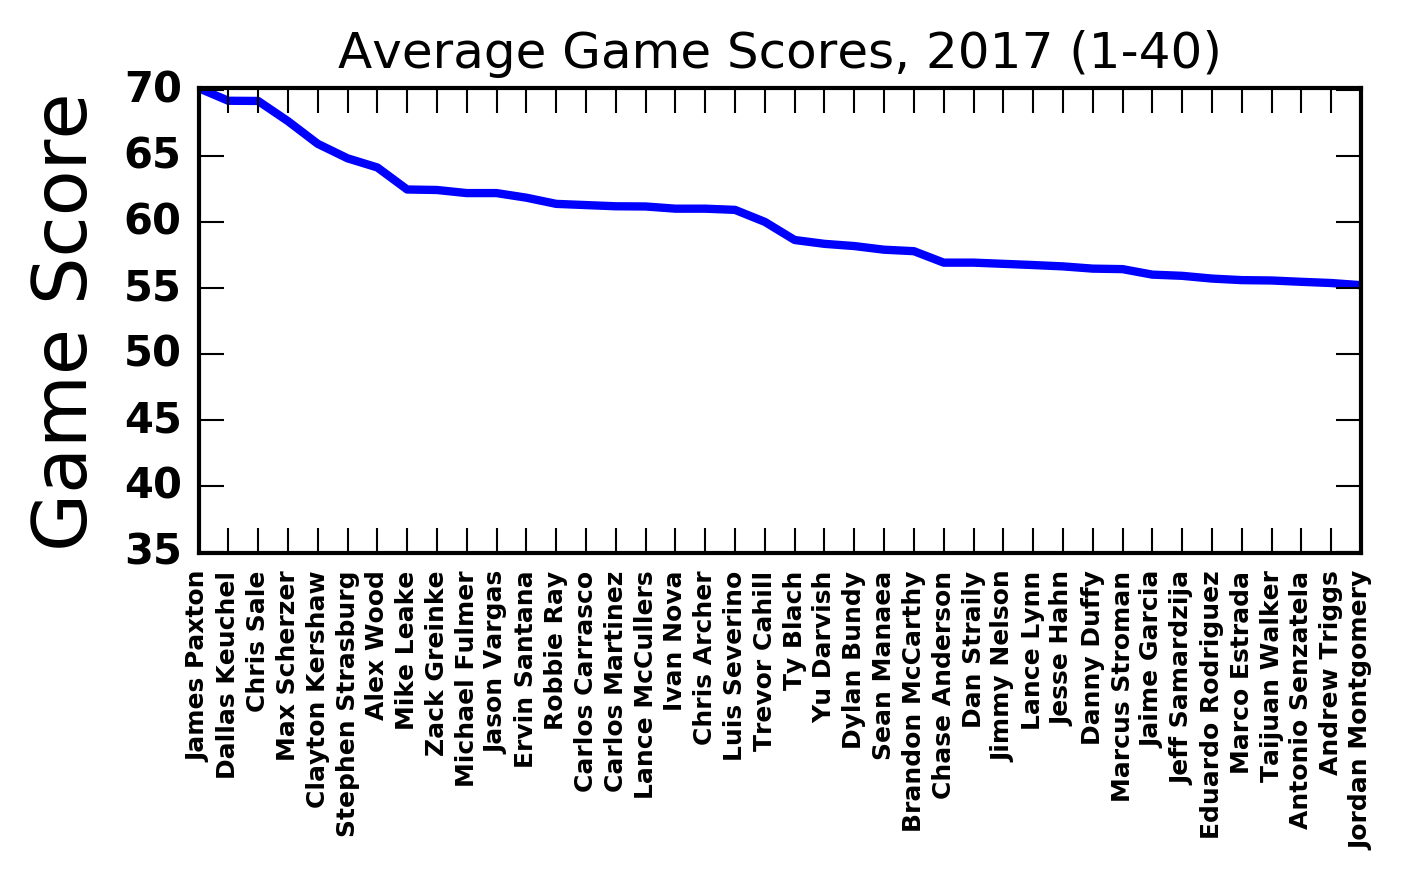

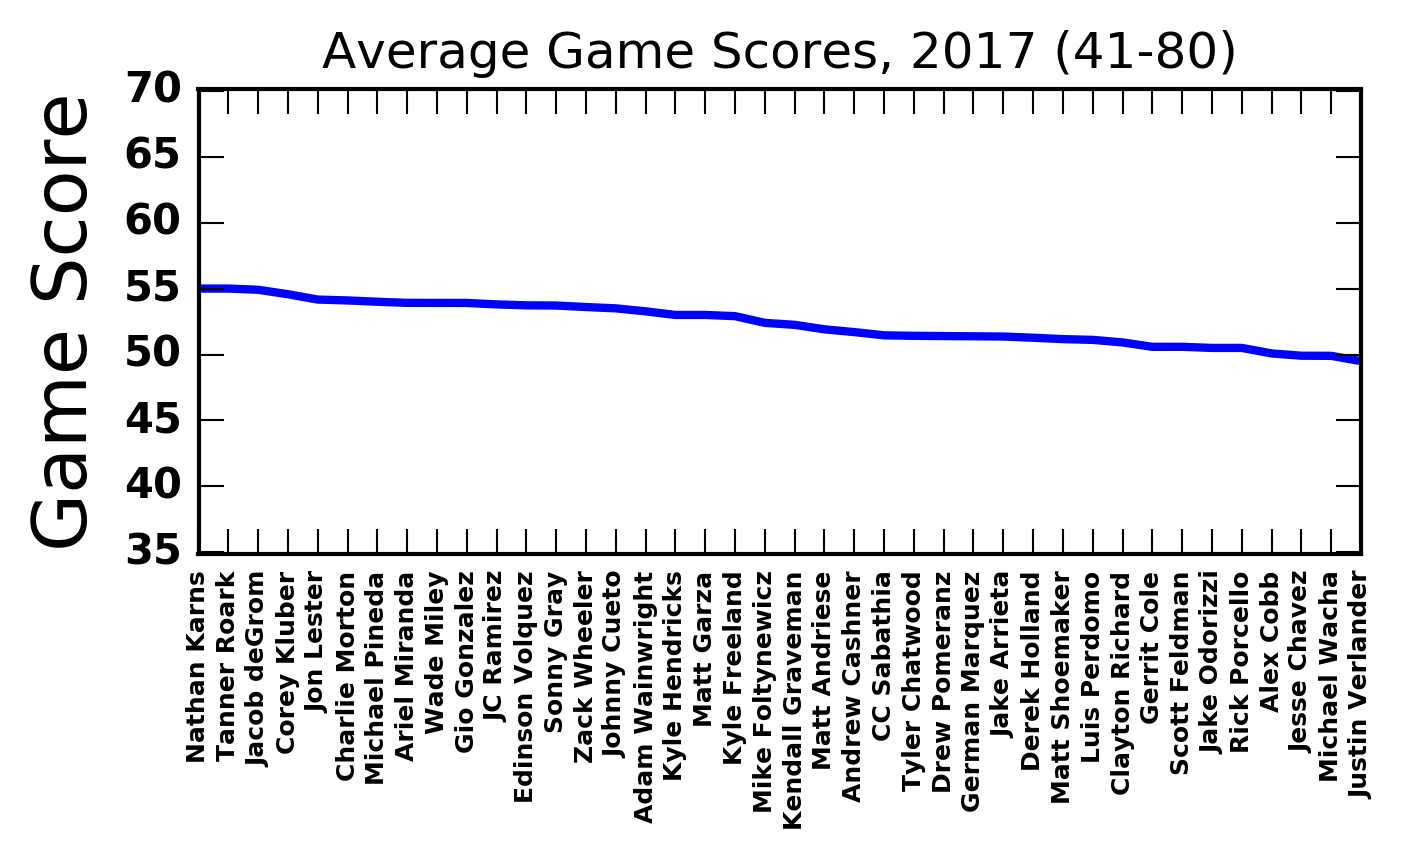

In [4]:
outs = 3.*(np.floor(Starters['IP']) + 10.*(Starters['IP']-np.floor(Starters['IP'])))

game_score = 40. + ((2.*outs) + (Starters['SO']) - (2.*Starters['BB']) - (2.*Starters['H']) - (3.*Starters['ER']) - (6.*Starters['HR']))/Starters['GS']

player = Starters['Name']

order = (-1.*game_score).argsort()

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,game_score.size,game_score.size),game_score[order])
plt.ylabel('Game Score',size=18)
plt.title('Average Game Scores, 2017 (1-40)')

_ = plt.axis([1.,40.,np.min(game_score),np.max(game_score)])
# You can specify a rotation for the tick labels in degrees or with keywords.
#_ = plt.xticks(np.linspace(1.,game_score.size,game_score.size), player[order], rotation='vertical')
_ = plt.xticks(np.linspace(1.,40.,40.), player[order[0:40]], rotation='vertical',size=6)



# next set
plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,game_score.size,game_score.size),game_score[order])
plt.ylabel('Game Score',size=18)
plt.title('Average Game Scores, 2017 (41-80)')

_ = plt.axis([41.,80.,np.min(game_score),np.max(game_score)])
# You can specify a rotation for the tick labels in degrees or with keywords.
#_ = plt.xticks(np.linspace(1.,game_score.size,game_score.size), player[order], rotation='vertical')
_ = plt.xticks(np.linspace(41.,80.,40), player[order[40:80]], rotation='vertical',size=6)



That basically got us to nominal league average (50). Edinson Volquez appears down there slotted between **JC Ramirez** and **Sonny Gray**. Full disclosure, I just traded for Gray, so this seems like a great spot to be.

That said, what is Volquez' career distribution of game scores like?

Average Game Score: 53.1023
Median Game Score: 55.0
Standard Deviation: 18.0955


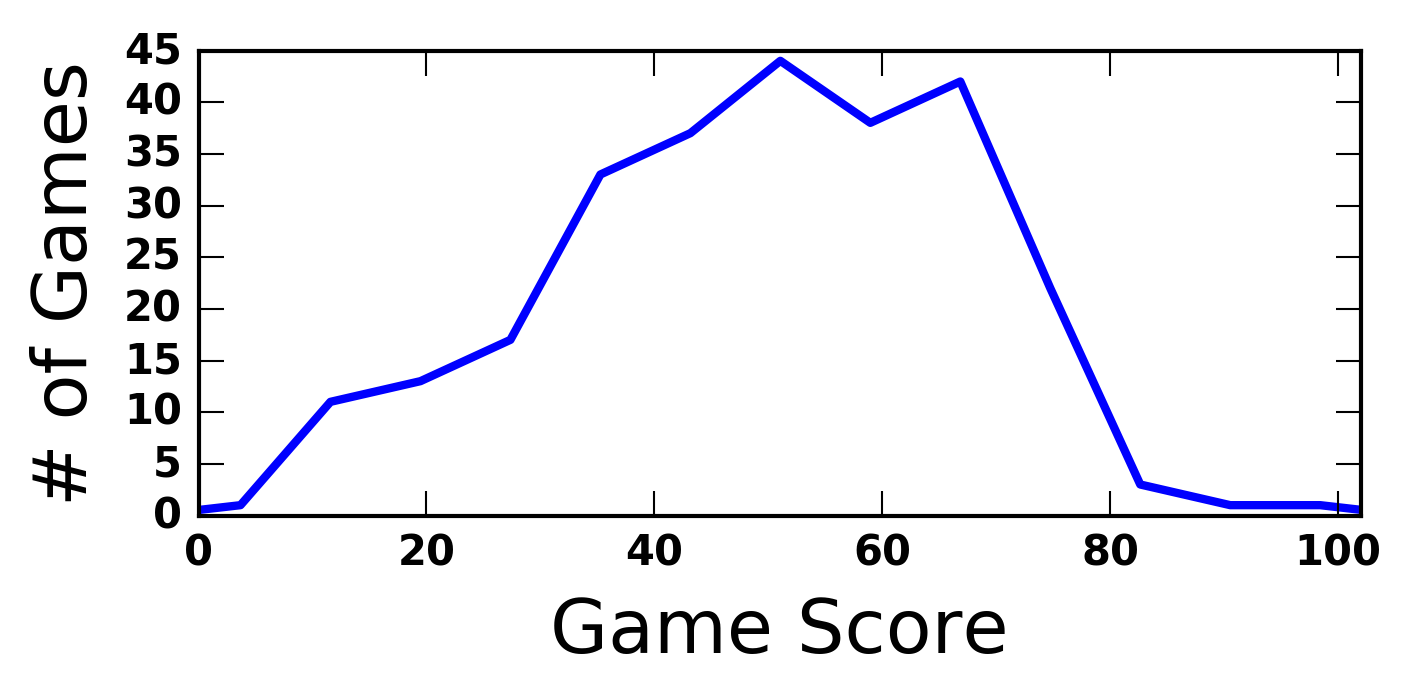

In [5]:
outs = 3.*(np.floor(Volquez['IP']) + 10.*(Volquez['IP']-np.floor(Volquez['IP'])))

game_score = 40. + ((2.*outs) + (Volquez['SO']) - (2.*Volquez['BB']) - (2.*Volquez['H']) - (3.*Volquez['ER']) - (6.*Volquez['HR']))

gscores = np.linspace(-20.,130.,20)
pos = np.digitize(game_score,gscores) - 1
gbins = np.zeros_like(gscores)
for i in pos:
    gbins[i] += 1
    

plt.figure(figsize=(5,2))
plt.plot(gscores,gbins)
plt.xlabel('Game Score',size=18)
plt.ylabel('# of Games',size=18)
_ = plt.axis([0.,102.,0.,45.])

print 'Average Game Score:',np.mean(game_score)
print 'Median Game Score:',np.median(game_score)
print 'Standard Deviation:',np.std(game_score)



A game score of 100, as Volquez achieved in the no-hitter, is *actually only a 2.6$\sigma$ outlier!* By sticking around this long, Volquez has actually iterated enough to give himself a good shot at the low-likelihood outcomes (I'll point out here that he also has a -16 recorded game score, so he's really sampling the distribution).

What should we take away from this?

Clearly, this is a low likelihood outcome. In fact, he'd only sniffed a game score of 90 once before, on a one-hitter in 2012. That's ancient baseball history now, and the version we are seeing now is maybe even a touch worse than his career median. 

Plenty of pitchers who have much higher game scores this year will never throw a no-hitter, and maybe not even a one-hitter (I'm looking at you, **James Paxton**). More analysis is required for looking at other pitchers, perhaps I'll get back to that later this year.

### It's James Paxton time!

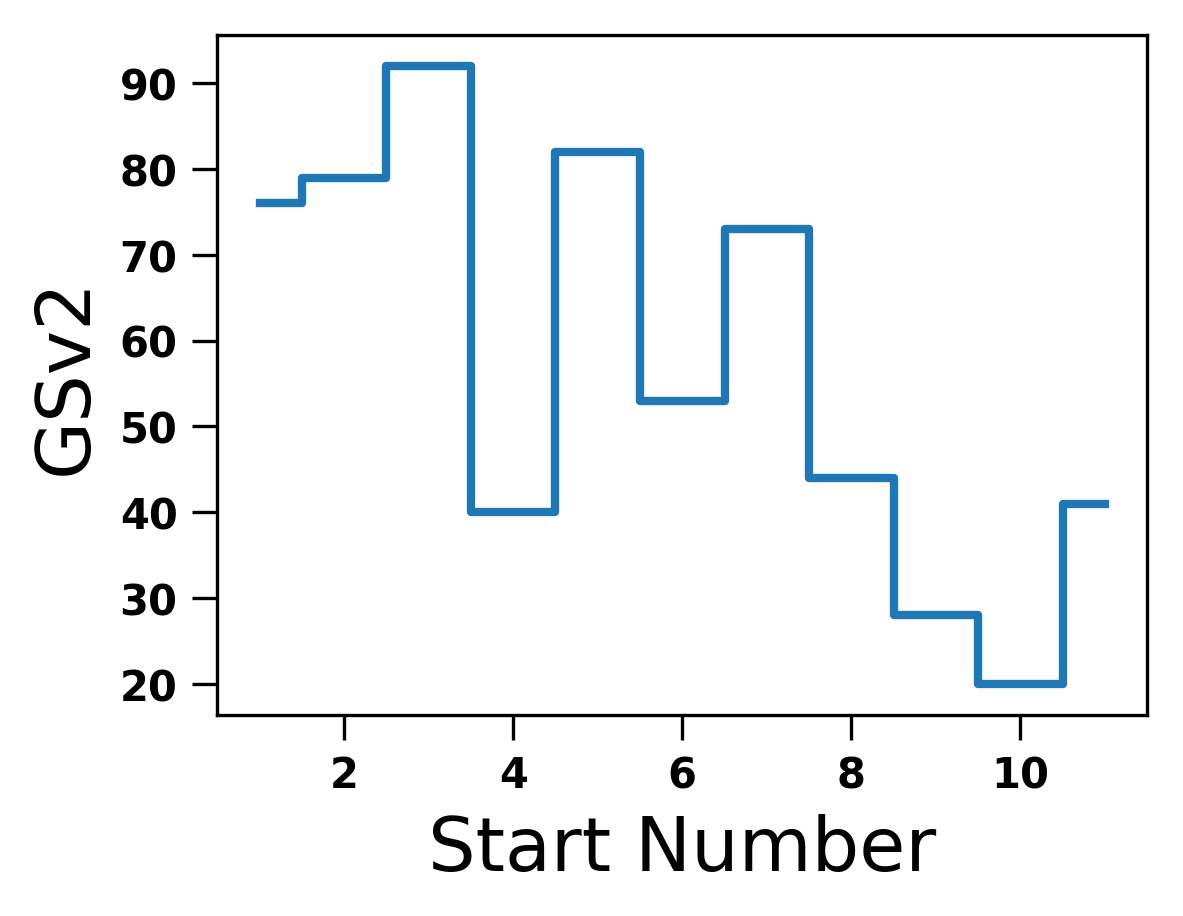

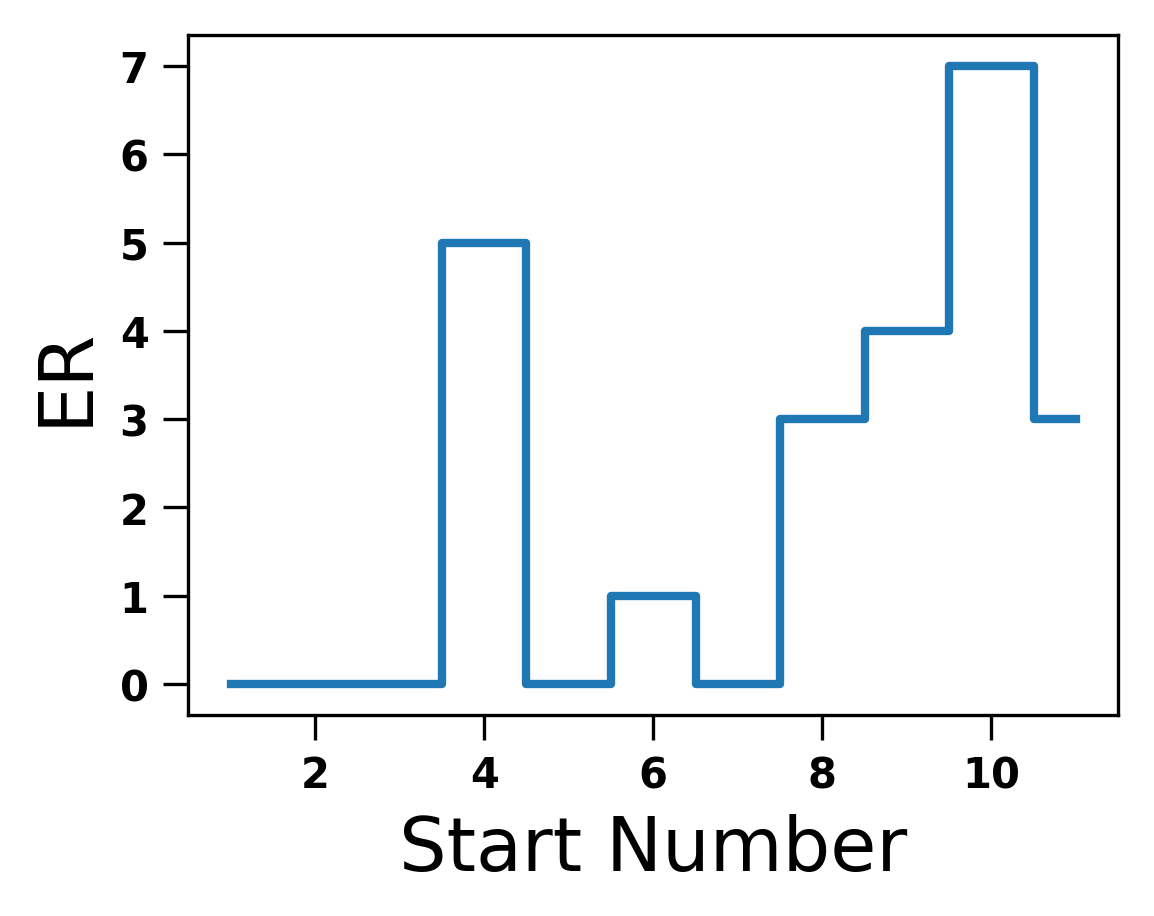

In [26]:
Paxton = read_starts_new('2017Pitching/Paxton_games.csv')

plt.figure(figsize=(4,3))

plt.plot(np.arange(1,Paxton["GSv2"].size+1,1),Paxton["GSv2"][::-1],drawstyle='steps-mid')

plt.xlabel('Start Number',size=18)
plt.ylabel('GSv2',size=18)

plt.figure(figsize=(4,3))

plt.plot(np.arange(1,Paxton["ER"].size+1,1),Paxton["ER"][::-1],drawstyle='steps-mid')

plt.xlabel('Start Number',size=18)
plt.ylabel('ER',size=18)